<img src="res/PP_logotyp_ANG_CMYK.svg" width="90%" />

# Foreword

The following report is an analysis of the top tech stocks from the US market. It concerns deciding the best stock for
an investment, based on given risk factor. Let us try to dig in why we need such type of analysis.

Everything starts with investment and its return with some safety and security. Since there is a lot of stocks to choose
from and every investor has their own needs when it comes to the measure of subjectively *best* stock. That is why it is
really important to filter the stocks on some parameters when formulating personal stock portfolio.

As an example, we will analyze stocks of top 4 US tech companies to see  which stock is more suitable for a portfolio
based on risk factor.

# Setting up

## Tools

For data processing and visualization, we are going to use python with the following tools:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from pandas_datareader.data import DataReader
from datetime import datetime

## Datasets

The datasets we are using are imported from Yahoo reader. The 4 stocks will be
- `AAPL` - Apple
- `GOOG` - Google
- `MSFT` - Microsoft
- `AMZN` - Amazon

In [20]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# TODO - hardcode date
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

# display data characteristics
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2022-04-13,3120.500000,2992.000000,3000.370117,3110.820068,2669500.0,3110.820068,AMAZON
2022-04-14,3117.939941,3029.439941,3107.800049,3034.129883,2575200.0,3034.129883,AMAZON
2022-04-18,3080.790039,3005.010010,3030.469971,3055.699951,2325700.0,3055.699951,AMAZON
2022-04-19,3172.979980,3031.010010,3040.590088,3162.310059,2746300.0,3162.310059,AMAZON
2022-04-20,3152.050049,3072.070068,3152.050049,3079.959961,2981500.0,3079.959961,AMAZON
2022-04-21,3134.760010,2951.790039,3094.280029,2965.919922,3198500.0,2965.919922,AMAZON
2022-04-22,2992.300049,2873.949951,2965.000000,2887.000000,3649800.0,2887.000000,AMAZON
2022-04-25,2924.429932,2846.129883,2880.459961,2921.479980,3093700.0,2921.479980,AMAZON
2022-04-26,2897.120117,2778.590088,2896.000000,2787.820068,3847400.0,2787.820068,AMAZON


## Individual stocks descriptions:

### APPL

In [4]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,154.706878,151.487589,153.021818,153.158182,8.650680e+07,152.837636
std,16.287644,15.533476,15.949315,15.934595,2.550343e+07,16.111501
min,124.639999,122.250000,123.160004,122.769997,4.100000e+07,122.251930
25%,144.750000,142.539993,143.460007,143.289993,6.902310e+07,142.899109
50%,151.570007,149.089996,150.199997,150.190002,8.086110e+07,149.809128
75%,169.679993,165.500000,167.479996,166.559998,9.867070e+07,166.559998
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.778397


### GOOG

In [ ]:
GOOG.describe()

### MSFT

In [ ]:
MSFT.describe()

### AMZN

In [ ]:
AMZN.describe()

# Analysis

## Pair trading similarity

TODO - comments/explanations

Here we are trying to see if some stock have simlarity for pair trading 

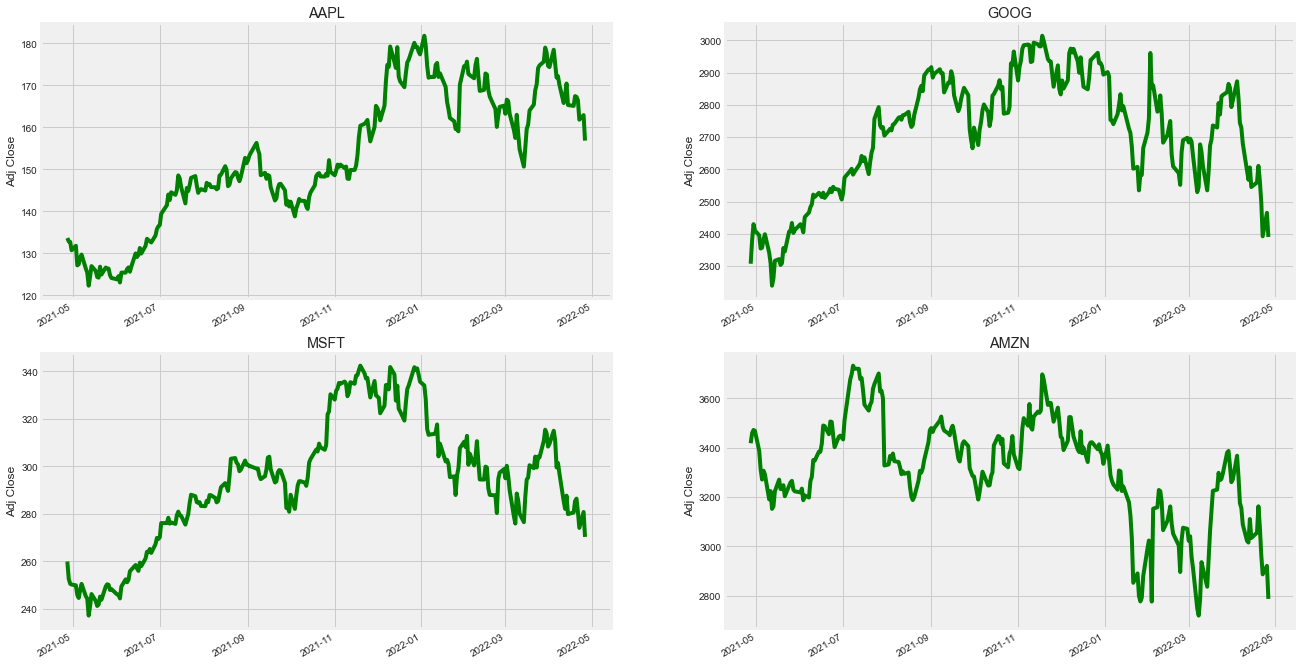

In [5]:
plt.figure(figsize=(20, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color='g')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## Daily stocks exchange

TODO - comments/explanations (volume, see comment in code block)

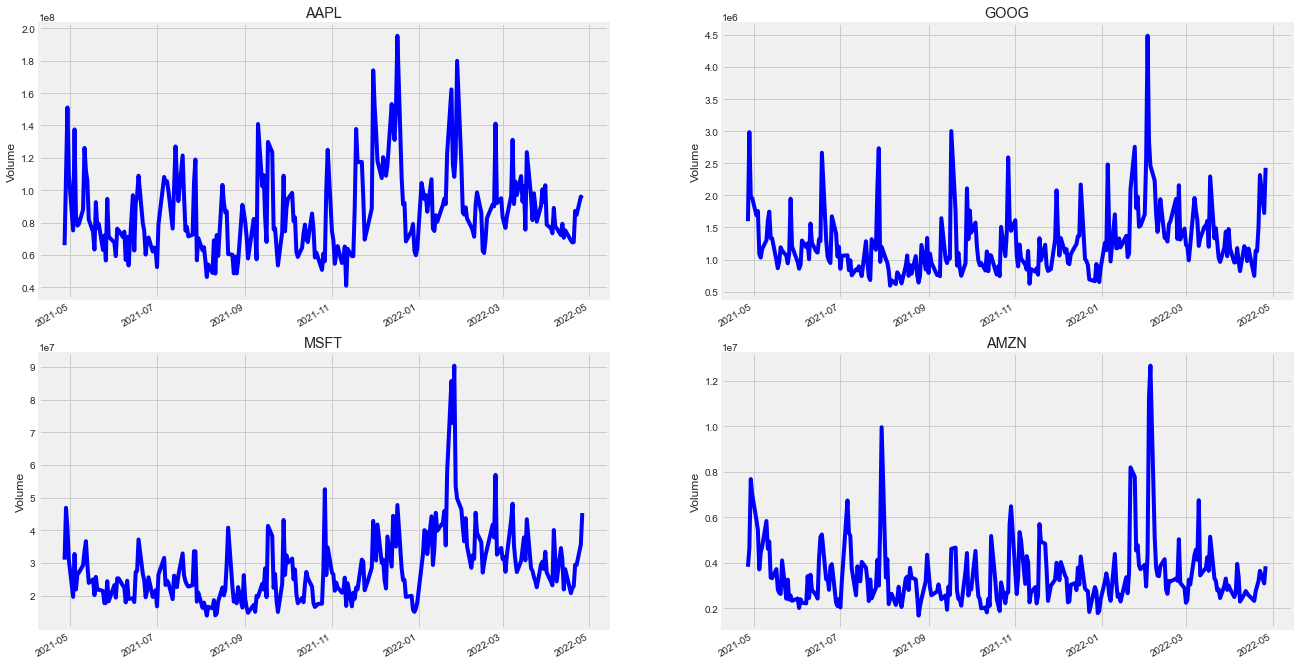

In [6]:
# Plotting the total volume of stock being traded each day
plt.figure(figsize=(20, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color='b')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## Moving Average

TODO - comments/explanations

Moving averages are usually calculated to identify the trend direction of a stock or to determine its support and resistance levels. So it repersents a best time for buying and selling based on crossover of moving average 20 and 50, it means if it cross below the resistance level then its time to buy

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

df.groupby("company_name").hist(figsize=(20, 10));

TODO - comments/explanations (breaking the above figure from this one)

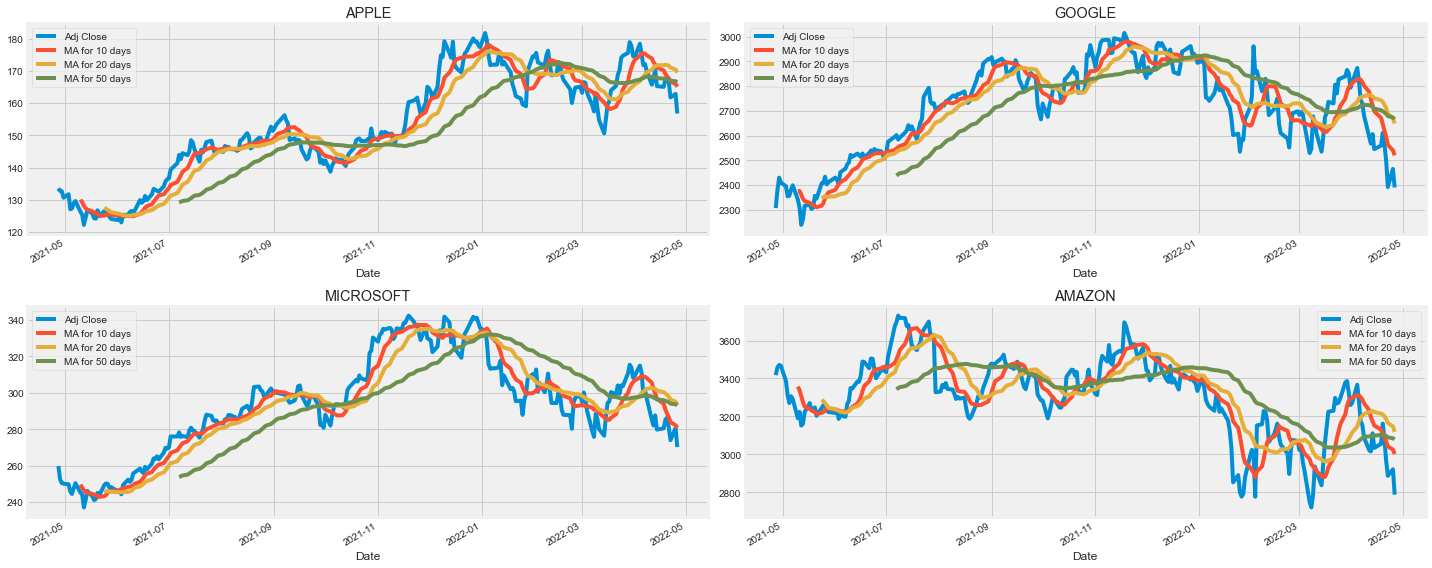

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(20)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Daily average return

TODO - comments/explanations

The daily return measures the dollar change in a stock's price as a percentage of the previous day's closing price. 

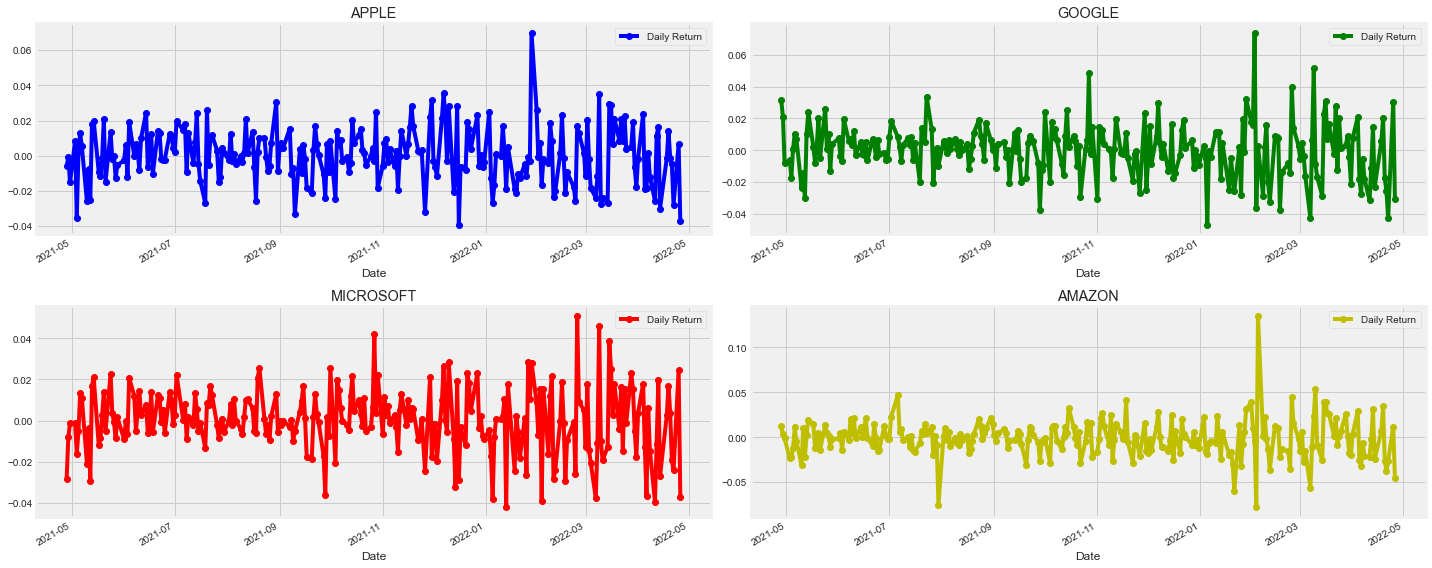

In [10]:
# Finding the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Plotting the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(20)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True,  marker='o',color='b')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True,  marker='o',color='g')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, marker='o',color='r')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True,  marker='o',color='y')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

TODO - comments/explanations (breaking up figure from the above)

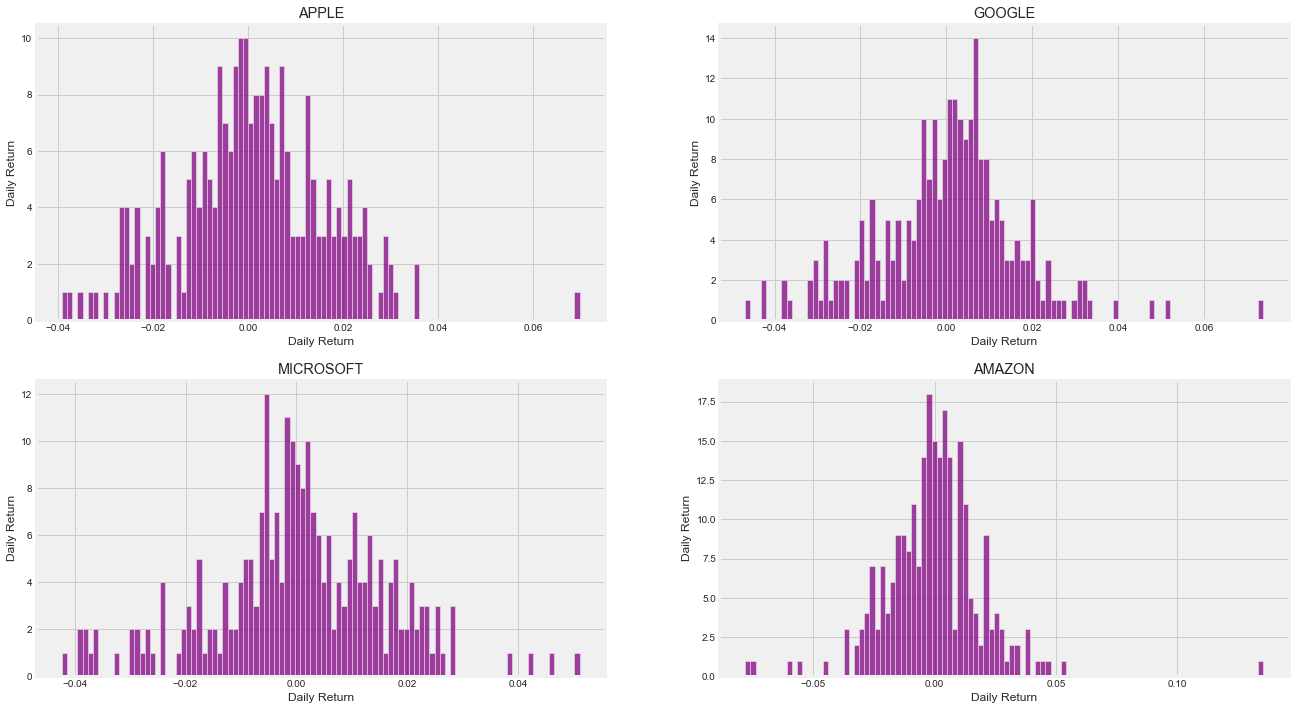

In [11]:
plt.figure(figsize=(20, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.histplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

## Correlation

TODO - comments/explanation

Correlation plays a very important role in terms of avoiding huge losses in terms of short period of time

TODO - give explanation of the below

In [12]:
# TODO - is the below simpy close price?
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-27,133.595963,2307.120117,259.853394,3417.429932
2021-04-28,132.790756,2379.909912,252.503250,3458.500000
2021-04-29,132.691345,2429.889893,250.469818,3471.310059
2021-04-30,130.683289,2410.120117,250.142487,3467.419922
2021-05-03,131.756882,2395.169922,249.825058,3386.489990


TODO - give explanation of the below

In [13]:
# TODO - is the below relative change between today and previous day (as in above)?
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-27,NaN,NaN,NaN,NaN
2021-04-28,-0.006027,0.031550,-0.028286,0.012018
2021-04-29,-0.000749,0.021001,-0.008053,0.003704
2021-04-30,-0.015133,-0.008136,-0.001307,-0.001121
2021-05-03,0.008215,-0.006203,-0.001269,-0.023340


### Pairplot

TODO - reformat text

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

TODO - explain the visualization

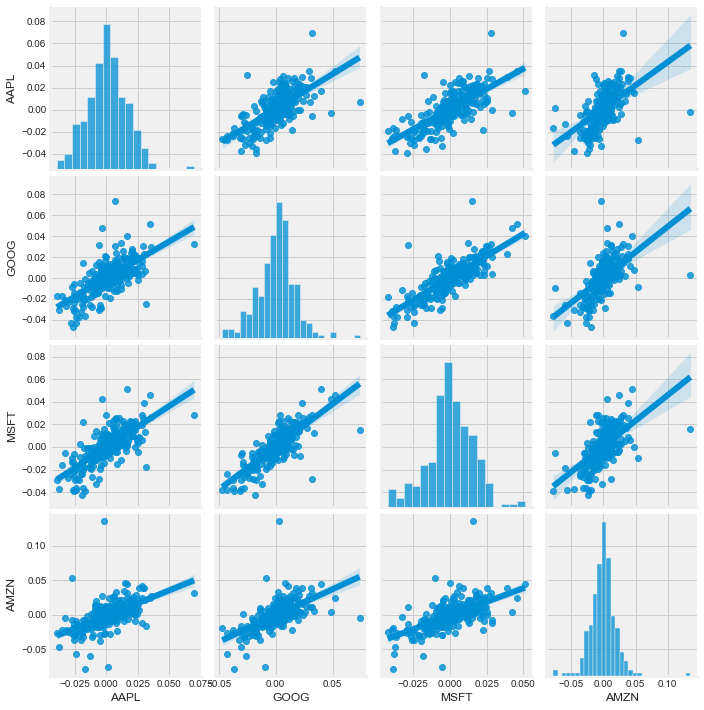

In [14]:
sns.pairplot(tech_rets, kind='reg')

### Return on risk factor

TODO - reformat text

Now, we are going to compare each stock its return on risk factor and cluster them together with other stock

TODO - explain the below (or ditch the above if duplicate)

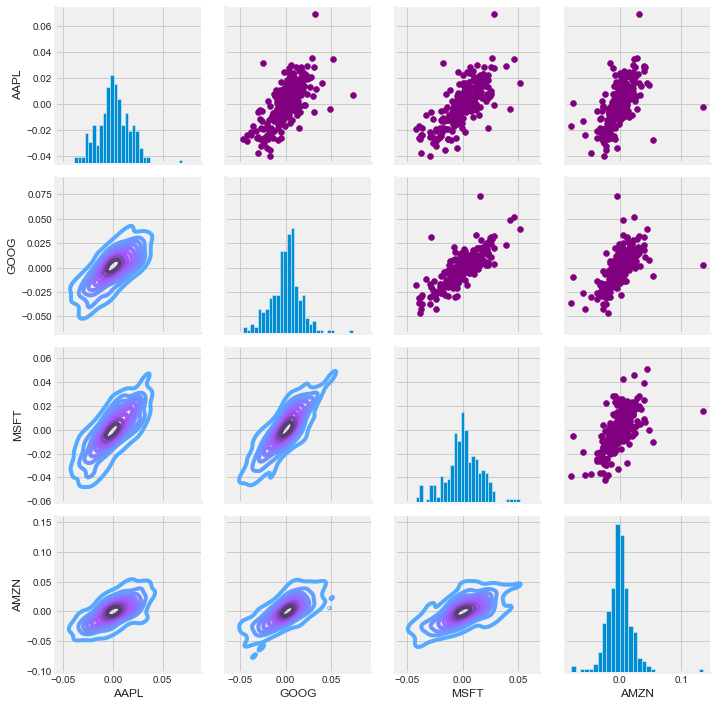

In [15]:
# TODO - duplicate of the above?
# Set up our figures
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

TODO - text for the below

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

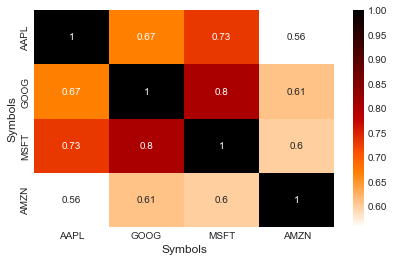

In [16]:
# TODO - give title
sns.heatmap(tech_rets.corr(), annot=True, cmap='gist_heat_r')

TODO - reformat text

We can clearly see that Apple and microsoft are highly correlated, so it's good to do pair trading rather than trading separately and wasting resources

TODO - explain the below

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

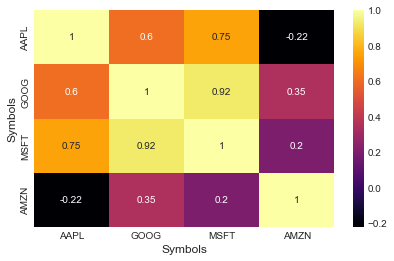

In [17]:
# TODO - what's this one about compared to the above?
sns.heatmap(closing_df.corr(), annot=True, cmap='inferno')

## Risk

TODO - comments/explanations

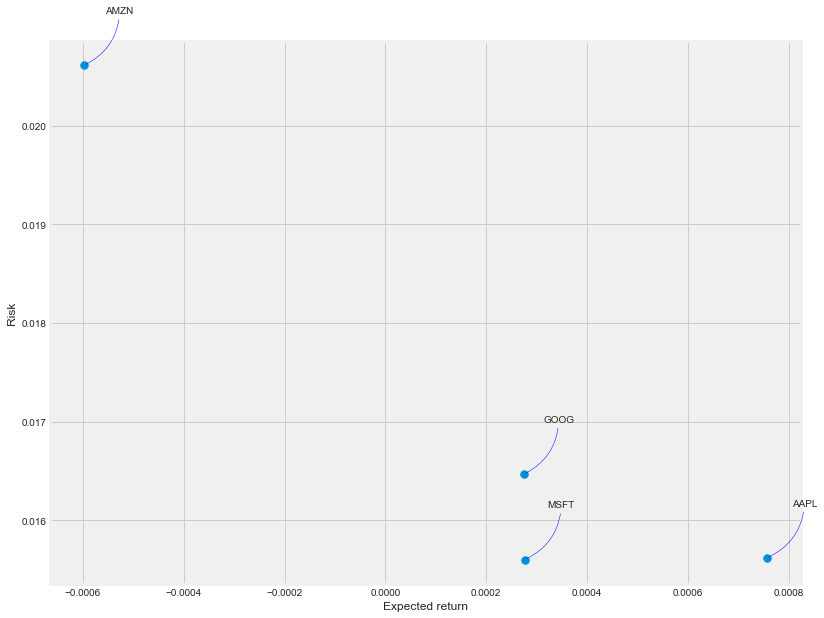

In [18]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

TODO - reformat (conclusion)

We can clearly see that *Apple* is one of the secured the investment in terms of higher return and low risk


TODO - Summary / Afterword